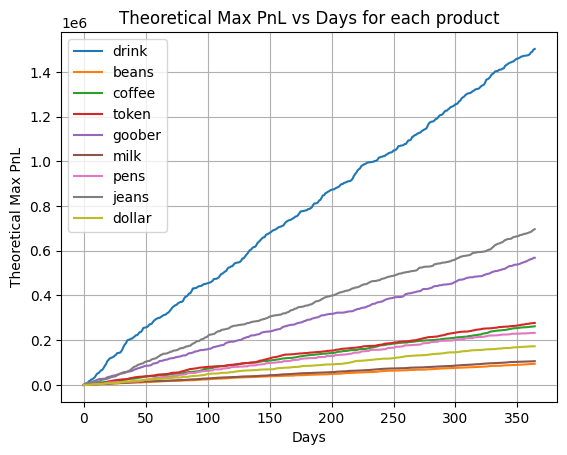

In [1]:
import pandas as pd

# load all products data into a dataframe
drink = pd.read_csv('/Users/jameshurst/Library/CloudStorage/SynologyDrive-james/Dropbox/Quant/AlgoJam2024/data/Fun Drink_price_history.csv')
beans = pd.read_csv('/Users/jameshurst/Library/CloudStorage/SynologyDrive-james/Dropbox/Quant/AlgoJam2024/data/Coffee Beans_price_history.csv')
coffee = pd.read_csv('/Users/jameshurst/Library/CloudStorage/SynologyDrive-james/Dropbox/Quant/AlgoJam2024/data/Coffee_price_history.csv')
token = pd.read_csv('/Users/jameshurst/Library/CloudStorage/SynologyDrive-james/Dropbox/Quant/AlgoJam2024/data/Fintech Token_price_history.csv')
goober = pd.read_csv('/Users/jameshurst/Library/CloudStorage/SynologyDrive-james/Dropbox/Quant/AlgoJam2024/data/Goober Eats_price_history.csv')
milk = pd.read_csv('/Users/jameshurst/Library/CloudStorage/SynologyDrive-james/Dropbox/Quant/AlgoJam2024/data/Milk_price_history.csv')
pens = pd.read_csv('/Users/jameshurst/Library/CloudStorage/SynologyDrive-james/Dropbox/Quant/AlgoJam2024/data/Red Pens_price_history.csv')
jeans = pd.read_csv('/Users/jameshurst/Library/CloudStorage/SynologyDrive-james/Dropbox/Quant/AlgoJam2024/data/Thrifted Jeans_price_history.csv')
dollar = pd.read_csv('/Users/jameshurst/Library/CloudStorage/SynologyDrive-james/Dropbox/Quant/AlgoJam2024/data/UQ Dollar_price_history.csv')
# put all dataframes into a list
dataframes = [drink, beans, coffee, token, goober, milk, pens, jeans, dollar]
# create a list of the names of the products
products = ['drink', 'beans', 'coffee', 'token', 'goober', 'milk', 'pens', 'jeans', 'dollar']
pos_limits = [10e3, 200, 30e3, 35, 75e3, 2.5e3, 40e3, 400, 650]

# use the above logic to create a function that will do this for all dataframes in the list 
def create_pnl(df, pos_limit):
    df['Diff'] = df['Price'].diff()
    df['AbsDiff'] = df['Diff'].abs()
    df['CumAbsDiff'] = df['AbsDiff'].cumsum()

    # create a column so that for row x, if row x+1['AbsDiff'] is positive, row x['Buy'] is 1, otherwise -1
    df['Buy'] = df['Diff'].shift(-1)
    df['Buy'] = df['Buy'].apply(lambda x: 1 if x > 0 else -1)
    df['Buy'] = df['Buy'].fillna(0)

    df['StockPosition'] = pos_limit*df['Buy']
    df['Transaction'] = df['StockPosition'].diff()
    df['Transaction'] = df['Transaction'].fillna(0 + df['StockPosition'])

    df['CashFlow'] = -df['Transaction'] * df['Price']
    df['CashPos'] = df['CashFlow'].cumsum()

    df['Theoretical Max PnL'] = df['StockPosition'] * df['Price'] + df['CashPos']
    return df

dfs_out = []
for i in range(len(dataframes)):
    dfs_out.append(create_pnl(dataframes[i], pos_limits[i]))

# plot the days vs the theoretical max PnL for all products
import matplotlib.pyplot as plt
for i in range(len(dfs_out)):
    plt.plot(dfs_out[i].index, dfs_out[i]['Theoretical Max PnL'])
plt.legend(products)
plt.grid()
plt.xlabel('Days')
plt.ylabel('Theoretical Max PnL')
plt.title('Theoretical Max PnL vs Days for each product')
plt.show()


In [2]:
# Print the final PnL for each product as an integer and the name of the product
for i in range(len(dfs_out)):
    print(f'The Theo max PnL for {products[i]} is {int(dfs_out[i].iloc[-1]["Theoretical Max PnL"])}')

The Theo max PnL for drink is 1502800
The Theo max PnL for beans is 94569
The Theo max PnL for coffee is 262200
The Theo max PnL for token is 277430
The Theo max PnL for goober is 568500
The Theo max PnL for milk is 106275
The Theo max PnL for pens is 232800
The Theo max PnL for jeans is 696548
The Theo max PnL for dollar is 172861


In [10]:
drink_achieved = 835400
beans_achieved = 0
coffee_achieved = 0
token_achieved = 42579.95
goober_achieved = 393000
milk_achieved = 0
pens_achieved = 100e3
jeans_achieved = 386060
dollar_achieved = 0

# store all in list
achieved_pnls = [drink_achieved, beans_achieved, coffee_achieved, token_achieved, goober_achieved, milk_achieved, pens_achieved, jeans_achieved, dollar_achieved]

percent_achieved = []

for i in range(len(dfs_out)):
    # check what proportion of the theoretical max PnL was achieved and append to a list
    # e.g. below
    drink_percentage = 100*achieved_pnls[i]/dfs_out[i].iloc[-1]["Theoretical Max PnL"]
    percent_achieved.append(drink_percentage)

# print the percentage of the theoretical max PnL that was achieved for each product
for i in range(len(percent_achieved)):
    print(f'The percentage of the theoretical max PnL that was achieved for {products[i]} is {percent_achieved[i]}')


The percentage of the theoretical max PnL that was achieved for drink is 55.58956614319936
The percentage of the theoretical max PnL that was achieved for beans is 0.0
The percentage of the theoretical max PnL that was achieved for coffee is 0.0
The percentage of the theoretical max PnL that was achieved for token is 15.347942371256295
The percentage of the theoretical max PnL that was achieved for goober is 69.12928759894459
The percentage of the theoretical max PnL that was achieved for milk is 0.0
The percentage of the theoretical max PnL that was achieved for pens is 42.95532646048101
The percentage of the theoretical max PnL that was achieved for jeans is 55.42475177590058
The percentage of the theoretical max PnL that was achieved for dollar is 0.0


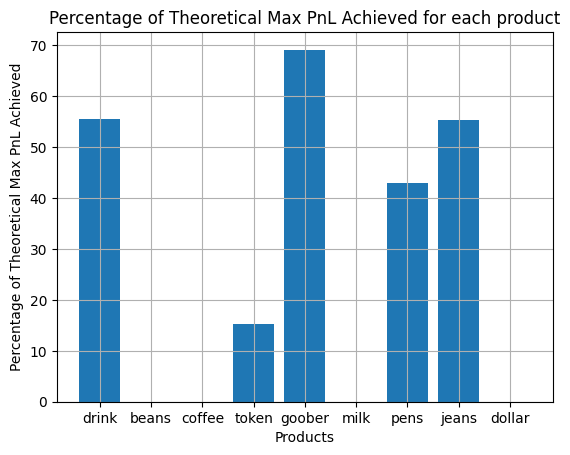

In [11]:
# plot the products and the percentage of the theoretical max PnL that was achieved
plt.bar(products, percent_achieved)
plt.xlabel('Products')
plt.ylabel('Percentage of Theoretical Max PnL Achieved')
plt.title('Percentage of Theoretical Max PnL Achieved for each product')
plt.grid()
plt.show()